In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [3]:
#Create a path to where your data is stored.
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset_scaled_correct.csv'))
climate

id     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0     -1.731975 -1.599964           0.660514          -0.02793   
1     -1.731824 -1.599964           0.244897          -0.02793   
2     -1.731673 -1.599964           1.076130          -0.02793   
3     -1.731523 -1.599964          -1.001953          -0.02793   
4     -1.731372 -1.599964           0.244897          -0.02793   
...         ...       ...                ...               ...   
22945  1.731372  1.013583          -1.833187          -0.02793   
22946  1.731523  1.013583           0.244897          -0.02793   
22947  1.731673  1.013583          -0.586336          -0.02793   
22948  1.731824  1.013583          -0.170720          -0.02793   
22949  1.731975  1.013583          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
0                -0.265148         -0.179228       -0.902918  ...   
1                 1.658760         -0.179228       -0.810126  ...   
2                 0.155707         -0.179228       -1.065304  ...   
3                -0.445514         -0.179228       -0.114186  ...   
4                -0.164944         -0.179228        0.187388  ...   
...                    ...               ...             ...  ...   
22945            -0.004619         -0.179228        0.720943  ...   
22946            -0.004619         -0.179228        0.187388  ...   
22947            -0.004619         -0.179228        0.349774  ...   
22948            -0.004619         -0.179228        0.280180  ...   
22949            -0.004619         -0.179228       -0.322968  ...   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...                ...   
22945               -0.005560            -0.024706          -0.018319   
22946               -0.005560            -0.024706          -0.018319   
22947               -0.005560            -0.024706          -0.0

In [5]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [6]:
df

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101 -1.599964        -0.528623           -1.016876   
1      19600102 -1.599964        -0.582946           -1.107669   
2      19600103 -1.599964        -0.257010           -1.084971   
3      19600104 -1.599964        -0.555784           -1.209812   
4      19600105 -1.599964        -1.003946           -1.209812   
...         ...       ...              ...                 ...   
22945  20221027  1.013583         0.747959            0.628750   
22946  20221028  1.013583         0.856604            0.367720   
22947  20221029  1.013583         0.856604            0.083991   
22948  20221030  1.013583         0.680055            0.265577   
22949  20221031  1.013583         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKH

In [7]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')  # Convert DATE to datetime
df_1980 = df[df['DATE'].dt.year == 1980]

In [8]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
df_1980 = df.drop(['DATE','MONTH'], axis=1)

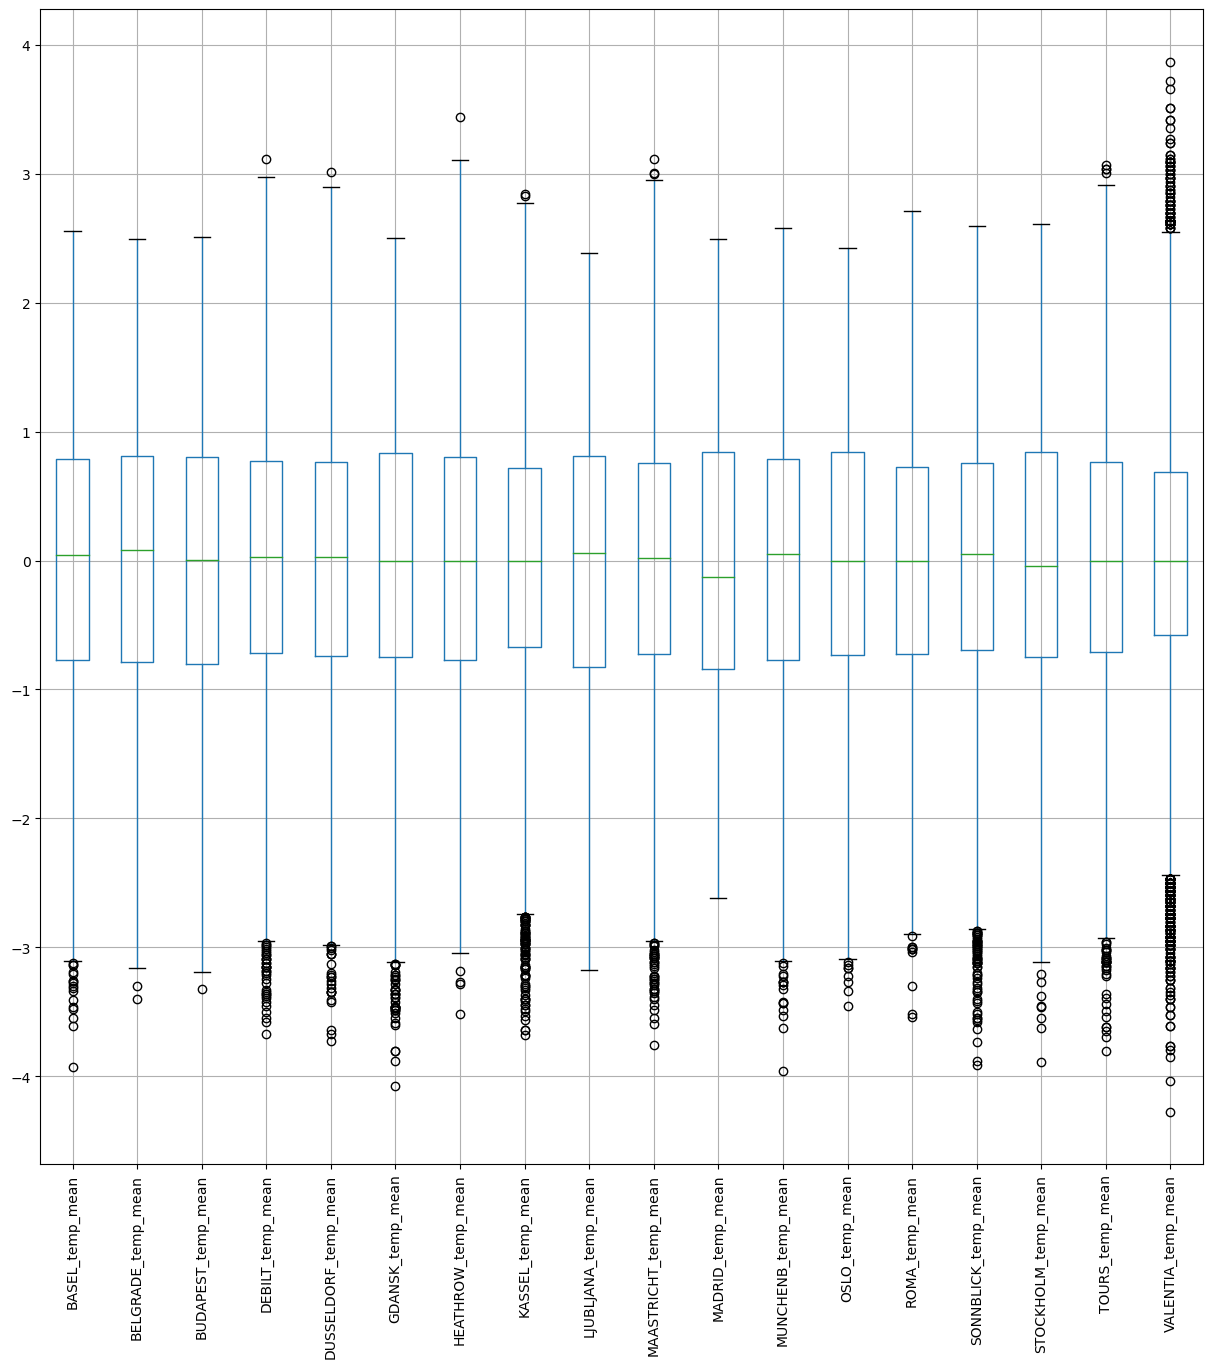

In [9]:
#Look at a whisker plot of the data to see variations in temperatures
plt.figure(figsize=(15, 15))
boxplot = df_1980.boxplot()
plt.xticks(rotation=90)
plt.show()

In [10]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1980')] #<-----INSERT YEAR HERE
dfyear

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
7305 1980-01-01 -1.599964        -1.520011           -1.504889   
7306 1980-01-02 -1.599964        -1.642237           -1.629730   
7307 1980-01-03 -1.599964        -1.492850           -1.720523   
7308 1980-01-04 -1.599964        -1.533592           -2.106394   
7309 1980-01-05 -1.599964        -1.003946           -1.902110   
...         ...       ...              ...                 ...   
7666 1980-12-27  1.594371        -1.316301           -1.300605   
7667 1980-12-28  1.594371        -1.601495           -1.300605   
7668 1980-12-29  1.594371        -1.778043           -1.346001   
7669 1980-12-30  1.594371        -1.750882           -1.436795   
7670 1980-12-31  1.594371        -1.682979           -1.663777   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
7305           -1.346195         -1.443423             -1.504866   
7306           -1.357958         -1.649112             -1.519592   
7307           -1.652043         -1.949735             -1.607952   
7308           -1.957892         -1.332668             -1.313420   
7309           -2.216686         -0.968756             -0.871621   
...                  ...               ...                   ...   
7666           -1.063873         -1.459245             -1.342873   
7667           -0.958002         -1.427601             -1.210333   
7668           -1.205034         -0.604845             -0.768534   
7669           -1.146217         -0.367511             -0.606541   
7670           -0.958002         -0.430800             -0.709628   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
7305         -1.183368           -2.272906         -1.585724   
7306         -1.157791           -2.272906         -1.511891   
7307         -1.234521           -1.504171         -2.058253   
7308         -1.439135           -1.049918         -1.570958   
7309         -1.682114           -1.119803         -1.157495   
...                ...                 ...               ...   
7666         -1.029908           -1.608998         -1.260860   
7667         -1.042696           -1.364400         -1.630024   
7668         -0.556739           -0.875205         -1.334693   
7669         -0.121935           -0.386009         -0.980296   
7670         -0.147511           -0.351067         -0.817864   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
7305            -1.504023             -1.537377         -0.327805   
7306            -1.600895             -1.552380         -0.880448   
7307            -1.673549             -1.567383         -1.271341   
7308            -2.048928             -1.207310         -1.271341   
7309            -1.286061             -0.922252         -1.257862   
...                   ...                   ...               ...   
7666            -1.140753             -1.462362         -1.244383   
7667            -1.358715             -1.492368         -1.513965   
7668            -1.927838             -0.892246         -1.325258   
7669            -1.988383             -0.682203         -1.001760   
7670            -1.976274             -0.832234         -1.325258   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
7305           -1.459643       -1.230172       -1.836111            -2.142594   
7306           -1.585317       -1.533543       -1.970817            -2.508221   
7307           -1.698423       -2.176691       -2.290743            -2.712972   
7308           -1.773827       -2.625680       -2.711698            -2.010968   
7309           -0.831274       -1.654892       -2.071846            -0.797085   
...                  ...             ...             ...                  ...   
7666           -1.371671       -1.606353       -1.819273            -1.981718   
7667           -1.962338       -0.465676       -1.701405            -1.879342   
7668           -2.515302       -0.077361       -1.667729            -0.928

In [11]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   1980-07-01 12:00:00    0.001171        -0.197121           -0.214033   
min    1980-01-01 00:00:00   -1.599964        -2.484237           -2.492265   
25%    1980-04-01 06:00:00   -0.728781        -0.902091           -1.005527   
50%    1980-07-01 12:00:00    0.142401        -0.229849           -0.160016   
75%    1980-09-30 18:00:00    0.940984         0.517087            0.537957   
max    1980-12-31 00:00:00    1.594371         1.929476            1.672872   
std                    NaN    1.003590         0.924807            0.939291   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.196820         -0.122397             -0.106802   
min             -2.769566         -2.693380             -2.432643   
25%             -0.978588         -0.865912             -0.812714   
50%             -0.128682         -0.090622             -0.105836   
75%              0.568299          0.692578              0.630495   
max              1.818161          1.990001              2.088432   
std              0.948622          0.990698              0.974691   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.214563           -0.146567         -0.165999   
min           -2.487780           -2.272906         -2.634148   
25%           -1.119426           -0.888308         -0.935997   
50%           -0.179482           -0.185090         -0.190287   
75%            0.722097            0.627324          0.655097   
max            1.796319            1.885256          2.135442   
std            1.020085            0.943949          1.031533   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.201214             -0.168943         -0.099360   
min              -2.678596             -2.497572         -2.039649   
25%              -0.989390             -0.854738         -0.890557   
50%              -0.202305             -0.194604         -0.280628   
75%               0.581753              0.563050          0.764001   
max               1.729081              1.973336          2.084952   
std               0.945756              0.956203          0.993644   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.217327       -0.138798       -0.197698   
min             -2.515302       -3.086805       -2.711698   
25%             -0.950664       -1.023880       -1.027877   
50%             -0.202905       -0.077361       -0.354349   
75%              0.522861        0.808483        0.807488   
max              2.159761        1.985564        2.120868   
std              0.944074        1.128937        1.067570   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.172441            -0.159358        -0.117418   
min              -3.063975            -2.904069        -2.516340   
25%              -0.899461            -1.022432        -0.916201   
50%              -0.109705            -0.154701        -0.069069   
75%               0.533799             0.753461         0.652562   
max               2.025558             1.873113         2.001698   
std               0.999295             1.074994         0.977255   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.111532  
min             -2.771167  
25%             -0.878510  
50%             -0.112435  
75%              0.713725  
max              2.155749  
std              1.047305

In [12]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [13]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [14]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [15]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [16]:
n_rows = dfyear.shape[0]
n_rows

366

In [21]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [19]:
X.shape, y.shape

((366, 2), (366, 1))

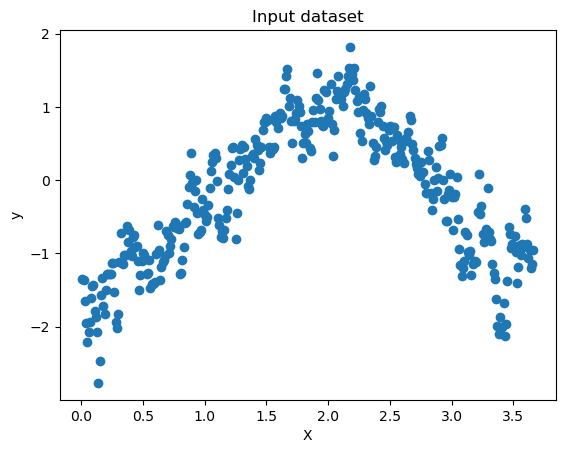

In [20]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BUDAPEST_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [22]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BUDAPEST_temp_mean'].min()

-2.7695664219053

In [23]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BUDAPEST_temp_mean'].max()

1.8181608239344664

In [24]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [25]:
compute_cost(X,y)

array([0.46808202])

In [26]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [45]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=500 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-5],[-7]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 15.6 ms
Wall time: 196 ms


In [46]:
theta

array([[-0.9556718 ],
       [ 0.36812701]])

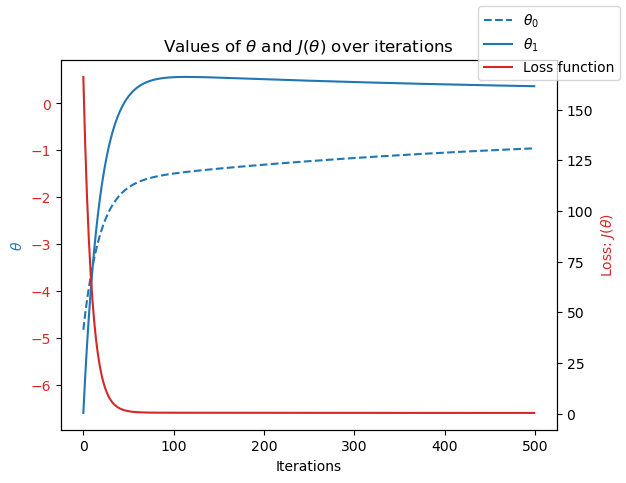

In [47]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [53]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,120) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,120) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 172 ms
Wall time: 1.9 s


In [54]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

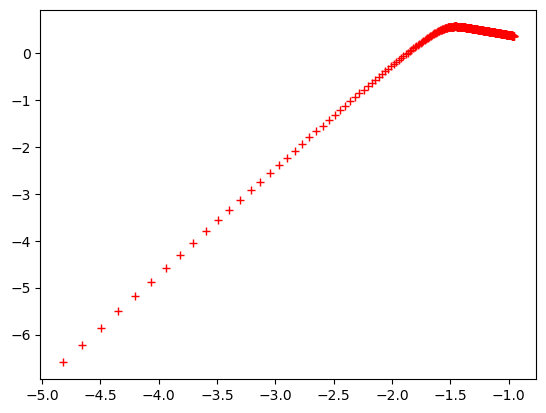

In [55]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [56]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=500 #<---start with the same iterations as above
theta_init=np.array([[-2],[-5]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

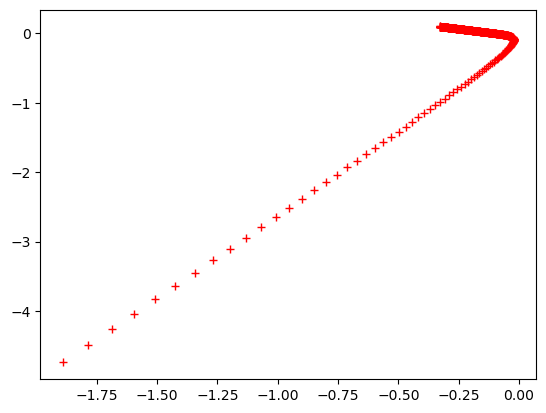

In [57]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

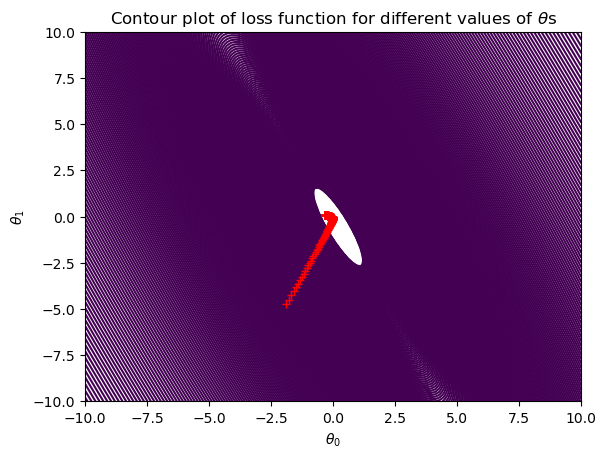

In [58]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

In [ ]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?